In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from Network import RKMNetwork
import networkx as nx
from scipy.interpolate import make_smoothing_spline
import ast
import matplotlib
from matplotlib import cm

lam=20

In [2]:
plt.rcParams.update({'font.size': 20})

In [3]:
def setup(df):
    df.Vtest = [ast.literal_eval(x) for x in df.Vtest]
    df.Vrecon = [ast.literal_eval(x) for x in df.Vrecon]
    df.Vtest_det = [ast.literal_eval(x) for x in df.Vtest_det]
    df.Vrecon_det = [ast.literal_eval(x) for x in df.Vrecon_det]
#     df.Davals[1:] = [ast.literal_eval(x) for x in df.Davals[1:]]
#     df.Ravals_forward[1:] = [ast.literal_eval(x) for x in df.Ravals_forward[1:]]
#     df.Ravals_back[1:] = [ast.literal_eval(x) for x in df.Ravals_back[1:]]

    MSEs = []
    MSEdet = []

    for trainingstep in df.trainingstep:
        row = df[df.trainingstep == trainingstep].iloc[0]


        Vtest = np.array(row.Vtest).T
        Vrecon = np.array(row.Vrecon).T
        MSE = np.mean(np.linalg.norm(Vtest-Vrecon, axis=0))

        Vtest_det = np.array(row.Vtest_det).T
        Vrecon_det = np.array(row.Vrecon_det).T
        MSEd = np.mean(np.linalg.norm(Vtest_det - Vrecon_det, axis=0))
        MSEdet.append(MSEd)
        MSEs.append(MSE)

    df['MSE'] = MSEs
    df['MSE_det'] = MSEdet


def plot_recon(df, step):
    row = df[df.trainingstep == step].iloc[0]


    Vtest = np.array(row.Vtest_det).T
    Vrecon = np.array(row.Vrecon_det).T
    
    fig, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(10,3))
    ax1.imshow(Vtest, cmap='binary')
    ax2.imshow(Vrecon, cmap='binary')
    
    ax1.set_xticks([])
    ax2.set_xticks([])

    ax1.set_ylabel(r'$V_i$')
    ax2.set_ylabel(r'$V_i$')

    ax1.set_title("Test data")

    ax2.set_title("Reconstructed data")
    fig.text(0,0.9,"Epoch = {}".format(row.epoch))
    fig.tight_layout()
    return fig
    
def plot_training(df):
    fig, (ax1, ax2) = plt.subplots(2,1, figsize=(5,8), sharex=True)

    Bnorm = matplotlib.colors.Normalize(vmin=-1, vmax=2)
    Wnorm = matplotlib.colors.Normalize(vmin=-2, vmax=4)
    wi = 0
    for c in df.columns:
        if c[:2] == "BV":
            i = int(c[2])
            color = cm.Greens(Bnorm(i),bytes=True)
            color = np.array(color)/255.
            label = ""
            if i == 1:
                label = "Visible Bias"
            ax1.plot(df.trainingstep, df[c], label = label, color = color)
        if c[:2] == "BH":
            i = int(c[2])
            color = cm.Blues(Bnorm(i),bytes=True)
            color = np.array(color)/255.
            label = ""
            if i == 1:
                label = "Hidden Bias"
            ax1.plot(df.trainingstep, df[c], label = label, color = color)
        if c[0] == "W":
            label = ""
            if wi == 2:
                label = "Weights"
            color = cm.Reds(Wnorm(wi),bytes=True)
            color = np.array(color)/255.
            ax1.plot(df.trainingstep, df[c], label = label, color = color)
            wi+=1
    ax1.legend(fontsize=10, loc='lower right')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel(r'$k_{ij}$')
    
    ax2.scatter(df.trainingstep, df.MSE, alpha=.1)
    ax2.scatter(df.trainingstep, df.MSE_det, alpha=0.2)
    spl = make_smoothing_spline(df.trainingstep, df.MSE, lam=lam)
    ax2.plot(df.trainingstep, spl(df.trainingstep), '-.', c='k')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('MSE')
#     ax2.set_xticks([0, 200, 400])
#     ax2.set_xticklabels([0, 100, 200])
    fig.tight_layout()
    return fig

# def plot_zigzag(df, xlim = [100, 200]):
    
#     Rnodes = df.Rnodevals.to_numpy()
#     Rnodes = np.array([np.array(ast.literal_eval(x)) for x in Rnodes[1:]])

#     Dnodes = df.Dnodevals.to_numpy()
#     Dnodes = np.array([np.array(ast.literal_eval(x)) for x in Dnodes[1:]])



#     fig, (ax1, ax2) = plt.subplots(2,1, sharex=True)

#     ax1.plot(df.epoch, df.L1k, label = 'L-V1')
#     ax1.plot(df.epoch, df.L2k, label = 'L-V2')
#     ax1.plot(df.epoch, df.M1k, label = 'V1-H1')
#     ax1.plot(df.epoch, df.M2k, label = 'V2-H1')
#     ax1.plot(df.epoch, df.R1k, label = 'H1-R')
# #     ax1.legend(fontsize=12)
#     ax2.set_xlabel('Epoch')
#     ax1.set_ylabel(r'$k_i$')

# #     ax2.plot(df.epoch[1:],Rnodes[:,1])
# #     ax2.plot(df.epoch[1:],Rnodes[:,2])
#     ax2.plot(df.epoch[1:],Rnodes[:,3])
#     ax2.set_ylabel("R state Hbar")

#     ax1.set_xlim(*xlim)
#     fig.tight_layout()
#     return fig

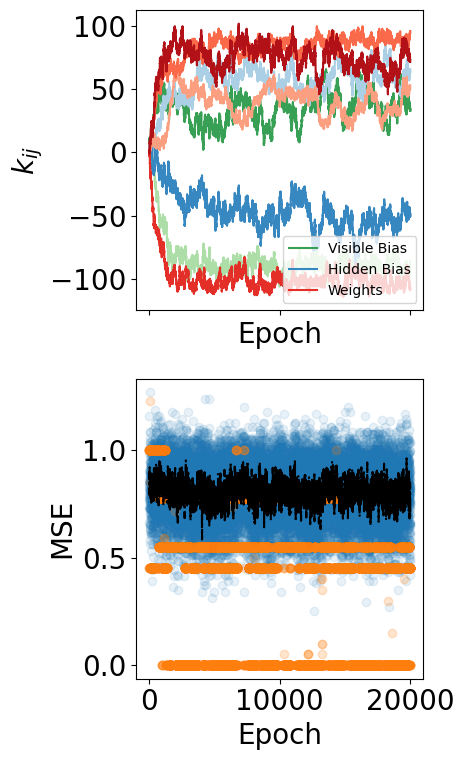

In [5]:
# 18
df = pd.read_csv('data/trainings/NV2NH2_500mV_detinf_L21e-4_init0_longtrain/train00.csv')
setup(df)
# df
fig= plot_training(df)

Text(0, 0.9, 'Epoch = 399')

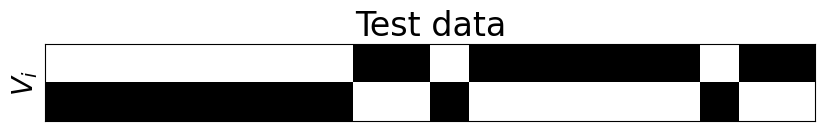

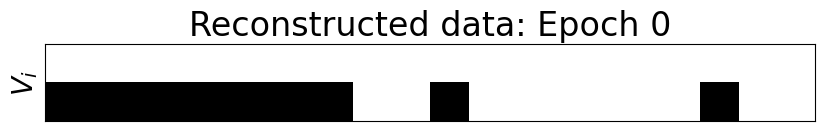

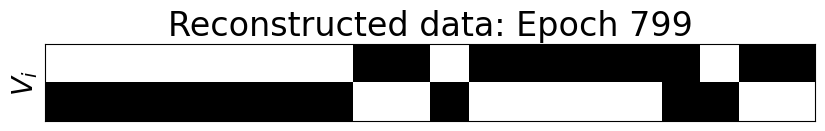

In [41]:
step = 0

last = df.iloc[-1].trainingstep

row = df[df.trainingstep == step].iloc[0]


Vtest = np.array(row.Vtest_det).T
Vrecon0 = np.array(row.Vrecon_det).T

step2 = last

row = df[df.trainingstep == step2].iloc[0]



Vrecon2 = np.array(row.Vrecon_det).T

# fig, (ax1, ax2, ax3) = plt.subplots(3,1, sharex=True, figsize=(10,3))
fig1, ax1 = plt.subplots(figsize=(10,1))
fig2, ax2 = plt.subplots(figsize=(10,1))
fig3, ax3 = plt.subplots(figsize=(10,1))

ax1.imshow(Vtest, cmap='binary')
ax2.imshow(Vrecon0, cmap='binary')
ax3.imshow(Vrecon2, cmap='binary')

ax1.set_xticks([])
ax2.set_xticks([])
ax3.set_xticks([])

ax1.set_yticks([])
ax2.set_yticks([])
ax3.set_yticks([])

ax1.set_ylabel(r'$V_i$')
ax2.set_ylabel(r'$V_i$')
ax3.set_ylabel(r'$V_i$')

ax1.set_title("Test data")

ax2.set_title("Reconstructed data: Epoch 0")
ax3.set_title("Reconstructed data: Epoch {}".format(step2))
fig.text(0,0.9,"Epoch = {}".format(row.epoch))
# fig1.tight_layout()
# fig2.tight_layout()
# fig3.tight_layout()

# fig1.savefig('figures/test_data_0728.png')
# fig2.savefig('figures/recon_data_0_0728.png')
# fig3.savefig('figures/recon_data_198_0728.png')

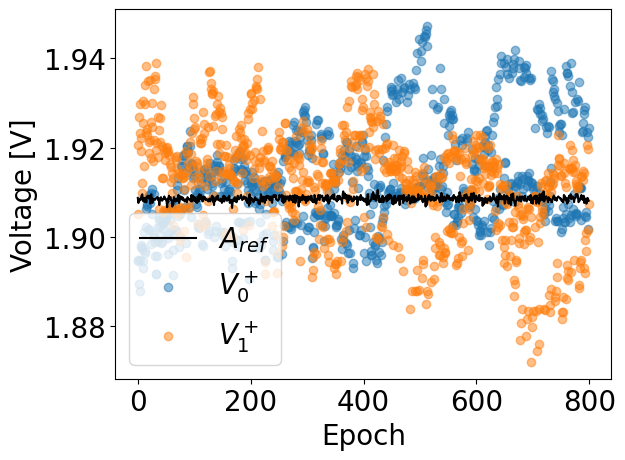

In [42]:
plt.plot(df.trainingstep, df.analogZero, c='k', zorder=5, label=r'$A_{ref}$')
#plt.hlines(np.mean(df.analogZero)+.1, 0, np.max(df.trainingstep))
plt.scatter(df.trainingstep, df.aV0, alpha=0.5, label=r'$V_0^+$')
plt.scatter(df.trainingstep, df.aV1, alpha=0.5, label=r'$V_1^+$')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Voltage [V]')
plt.show()

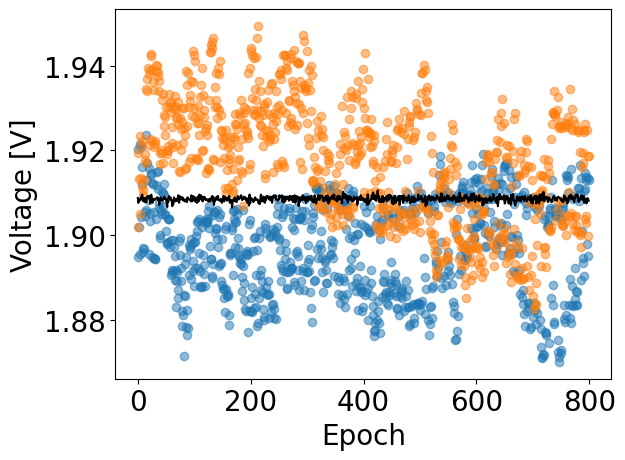

In [43]:
plt.plot(df.trainingstep, df.analogZero, c='k', zorder=5, label=r'$A_{ref}$')
plt.scatter(df.trainingstep, df.aH0, alpha=0.5, label=r'$H_0^+$')
plt.scatter(df.trainingstep, df.aH1, alpha=0.5, label=r'$H_1^+$')
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Voltage [V]')
plt.show()

C:\Users\FoamPerson\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\networkx\drawing\nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


(<Figure size 640x480 with 2 Axes>, <Axes: >)

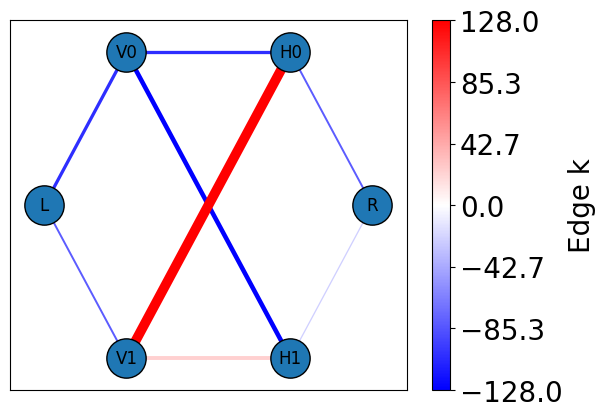

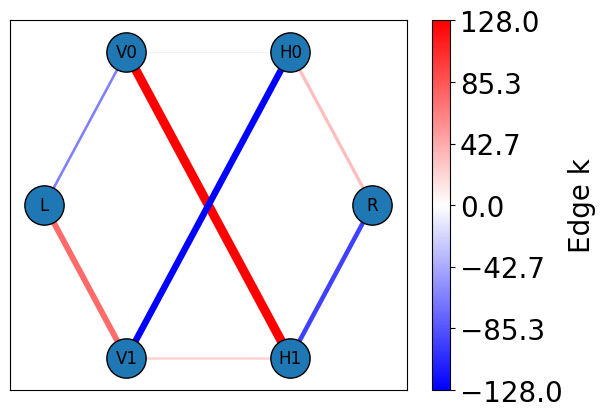

In [44]:
numV = 2
numH = 2

net = RKMNetwork(numV,numH)

row = df.iloc[0]

net.load_state(row)

net.draw_network_state()

row = df.iloc[-1]
net.load_state(row)
net.draw_network_state()

#net.draw_fullnetwork_state()